In [66]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [67]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/ΕΔΔΕ 1/dataset.csv')

In [68]:
df

,header,date,content,ttl_words
0,"Κορωνοϊός: 315 νέα κρούσματα στην Αττική, 31 σ...",2021-06-30,Στην Αττική εντοπίστηκαν για ακόμα ένα εικοσιτ...,424
1,"Κορωνοϊός: 633 νέα κρούσματα και 11 θάνατοι, σ...",2021-06-30,Συναγερμός επικρατεί στο επιστημονικό και κυβε...,311
2,Green Pass: Πρεμιέρα από αύριο για το Ευρωπαϊκ...,2021-06-30,Είσαι εμβολιασμένος; Έχεις αναρρώσει από την C...,1033
3,Η χώρα του 150άρικου,2021-06-30,Τόσο κοστίζει η συνείδηση του νέου ανθρώπου σή...,400
4,Γεωργιάδης: Δεν υπάρχουν άλλα λεφτά - Αν έρθει...,2021-06-30,Ο Άδωνις Γεωργιάδης έκρουσε τον κώδωνα του κιν...,264
...,...,...,...,...
505,Πελώνη: Έτοιμη να εφαρμόσει το ψηφιακό πιστοπο...,2021-05-27,"Στο πρόγραμμα των εμβολιασμών, τη σταδιακή επα...",925
506,ΗΠΑ: Η FDA έδωσε άδεια επείγουσας χρήσης στη θ...,2021-05-27,Η Υπηρεσία Τροφίμων και Φαρμάκων στις ΗΠΑ (FDA...,117
507,Κορωνοϊός: Τρεις στους τέσσερις ασθενείς έχουν...,2021-05-27,Το 73% -σχεδόν οι τρεις στους τέσσερις ασθενεί...,274
508,Βασιλακόπουλος: Ελάχιστη πιθανότητα θρόμβωσης ...,2021-05-27,«Η πιθανότητα να πάθεις κάποια θρόμβωση ή επιπ...,346


In [69]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [70]:
import spacy

In [71]:
import numpy as np

In [72]:
nlp = spacy.load('el_core_news_sm')

In [73]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [74]:
df[df['date']==2021 ]['header']

Series([], Name: header, dtype: object)

In [75]:
text = df['header'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [76]:
text = df[df['date']==2021 ]['header'].str.cat(sep = ' ').replace("amp", ' ')

In [77]:
list(nlp.Defaults.stop_words)[0:20]

['πάντως',
 'εκείνον',
 'λιγάκι',
 'ποιάν',
 'έτερης',
 'έχομε',
 'όλες',
 'υπ',
 'άλλην',
 'ήσαστε',
 'ίδιαν',
 'τούτον',
 'έτεροι',
 'όσην',
 'ακόμα',
 'τόσου',
 'ορισμένων',
 'σας',
 'δείνα',
 'τοι']

In [78]:
# Stop words
# Link to greek stop words: https://www.translatum.gr/forum/index.php?topic=3550.0?topic=3550.0
STOP_WORDS = set(
    """
αδιάκοπα αι ακόμα ακόμη ακριβώς άλλα αλλά αλλαχού άλλες άλλη άλλην
άλλης αλλιώς αλλιώτικα άλλο άλλοι αλλοιώς αλλοιώτικα άλλον άλλος άλλοτε αλλού
άλλους άλλων άμα άμεσα αμέσως αν ανά ανάμεσα αναμεταξύ άνευ αντί αντίπερα αντίς
άνω ανωτέρω άξαφνα απ απέναντι από απόψε άρα άραγε αρκετά αρκετές
αρχικά ας αύριο αυτά αυτές αυτή αυτήν αυτής αυτό αυτοί αυτόν αυτός αυτού αυτούς
αυτών αφότου αφού
βέβαια βεβαιότατα
γι για γιατί γρήγορα γύρω
δα δε δείνα δεν δεξιά δήθεν δηλαδή δι δια διαρκώς δικά δικό δικοί δικός δικού
δικούς διόλου δίπλα δίχως
εάν εαυτό εαυτόν εαυτού εαυτούς εαυτών έγκαιρα εγκαίρως εγώ εδώ ειδεμή είθε είμαι
είμαστε είναι εις είσαι είσαστε είστε είτε είχα είχαμε είχαν είχατε είχε είχες έκαστα
έκαστες έκαστη έκαστην έκαστης έκαστο έκαστοι έκαστον έκαστος εκάστου εκάστους εκάστων
εκεί εκείνα εκείνες εκείνη εκείνην εκείνης εκείνο εκείνοι εκείνον εκείνος εκείνου
εκείνους εκείνων εκτός εμάς εμείς εμένα εμπρός εν ένα έναν ένας ενός εντελώς εντός
εναντίον  εξής  εξαιτίας  επιπλέον επόμενη εντωμεταξύ ενώ εξ έξαφνα εξήσ εξίσου έξω επάνω
επειδή έπειτα επί επίσης επομένως εσάς εσείς εσένα έστω εσύ ετέρα ετέραι ετέρας έτερες
έτερη έτερης έτερο έτεροι έτερον έτερος ετέρου έτερους ετέρων ετούτα ετούτες ετούτη ετούτην
ετούτης ετούτο ετούτοι ετούτον ετούτος ετούτου ετούτους ετούτων έτσι εύγε ευθύς ευτυχώς εφεξής
έχει έχεις έχετε έχομε έχουμε έχουν εχτές έχω έως έγιναν  έγινε  έκανε  έξι  έχοντας
η ήδη ήμασταν ήμαστε ήμουν ήσασταν ήσαστε ήσουν ήταν ήτανε ήτοι ήττον
θα
ι ιδία ίδια ίδιαν ιδίας ίδιες ίδιο ίδιοι ίδιον ίδιοσ ίδιος ιδίου ίδιους ίδιων ιδίως ιι ιιι
ίσαμε ίσια ίσως
κάθε καθεμία καθεμίας καθένα καθένας καθενός καθετί καθόλου καθώς και κακά κακώς καλά
καλώς καμία καμίαν καμίας κάμποσα κάμποσες κάμποση κάμποσην κάμποσης κάμποσο κάμποσοι
κάμποσον κάμποσος κάμποσου κάμποσους κάμποσων κανείς κάνεν κανένα κανέναν κανένας
κανενός κάποια κάποιαν κάποιας κάποιες κάποιο κάποιοι κάποιον κάποιος κάποιου κάποιους
κάποιων κάποτε κάπου κάπως κατ κατά κάτι κατιτί κατόπιν κάτω κιόλας κλπ κοντά κτλ κυρίως
λιγάκι λίγο λιγότερο λόγω λοιπά λοιπόν
μα μαζί μακάρι μακρυά μάλιστα μάλλον μας με μεθαύριο μείον μέλει μέλλεται μεμιάς μεν
μερικά μερικές μερικοί μερικούς μερικών μέσα μετ μετά μεταξύ μέχρι μη μήδε μην μήπως
μήτε μια μιαν μιας μόλις μολονότι μονάχα μόνες μόνη μόνην μόνης μόνο μόνοι μονομιάς
μόνος μόνου μόνους μόνων μου μπορεί μπορούν μπρος μέσω  μία  μεσώ
να ναι νωρίς
ξανά ξαφνικά
ο οι όλα όλες όλη όλην όλης όλο ολόγυρα όλοι όλον ολονέν όλος ολότελα όλου όλους όλων
όλως ολωσδιόλου όμως όποια οποιαδήποτε οποίαν οποιανδήποτε οποίας οποίος οποιασδήποτε οποιδήποτε
όποιες οποιεσδήποτε όποιο οποιοδηήποτε όποιοι όποιον οποιονδήποτε όποιος οποιοσδήποτε
οποίου οποιουδήποτε οποίους οποιουσδήποτε οποίων οποιωνδήποτε όποτε οποτεδήποτε όπου
οπουδήποτε όπως ορισμένα ορισμένες ορισμένων ορισμένως όσα οσαδήποτε όσες οσεσδήποτε
όση οσηδήποτε όσην οσηνδήποτε όσης οσησδήποτε όσο οσοδήποτε όσοι οσοιδήποτε όσον οσονδήποτε
όσος οσοσδήποτε όσου οσουδήποτε όσους οσουσδήποτε όσων οσωνδήποτε όταν ότι οτιδήποτε
ότου ου ουδέ ούτε όχι οποία  οποίες  οποίο  οποίοι  οπότε  ος
πάνω  παρά  περί  πολλά  πολλές  πολλοί  πολλούς  που  πρώτα  πρώτες  πρώτη  πρώτο  πρώτος  πως
πάλι πάντα πάντοτε παντού πάντως πάρα πέρα πέρι περίπου περισσότερο πέρσι πέρυσι πια πιθανόν
πιο πίσω πλάι πλέον πλην ποιά ποιάν ποιάς ποιές ποιό ποιοί ποιόν ποιός ποιού ποιούς
ποιών πολύ πόσες πόση πόσην πόσης πόσοι πόσος πόσους πότε ποτέ πού πούθε πουθενά πρέπει
πριν προ προκειμένου πρόκειται πρόπερσι προς προτού προχθές προχτές πρωτύτερα πώς
σαν σας σε σεις σου στα στη στην στης στις στο στον στου στους στων συγχρόνως
συν συνάμα συνεπώς συχνάς συχνές συχνή συχνήν συχνής συχνό συχνοί συχνόν
συχνός συχνού συχνούς συχνών συχνώς σχεδόν
τα τάδε ταύτα ταύτες ταύτη ταύτην ταύτης ταύτοταύτον ταύτος ταύτου ταύτων τάχα τάχατε
τελευταία  τελευταίο  τελευταίος  τού  τρία  τρίτη  τρεις τελικά τελικώς τες τέτοια τέτοιαν
τέτοιας τέτοιες τέτοιο τέτοιοι τέτοιον τέτοιος τέτοιου
τέτοιους τέτοιων τη την της τι τίποτα τίποτε τις το τοι τον τοσ τόσα τόσες τόση τόσην
τόσης τόσο τόσοι τόσον τόσος τόσου τόσους τόσων τότε του τουλάχιστο τουλάχιστον τους τούς τούτα
τούτες τούτη τούτην τούτης τούτο τούτοι τούτοις τούτον τούτος τούτου τούτους τούτων τυχόν
των τώρα
υπ υπέρ υπό υπόψη υπόψιν ύστερα
χωρίς χωριστά
ω ως ωσάν ωσότου ώσπου ώστε ωστόσο ωχ
""".split()
)

In [79]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [80]:
df['header'] = df['header'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [81]:
df.head()

,header,date,content,ttl_words
0,"Κορωνοϊός: 315 νέα κρούσματα στην Αττική, 31 σ...",2021-06-30,Στην Αττική εντοπίστηκαν για ακόμα ένα εικοσιτ...,424
1,"Κορωνοϊός: 633 νέα κρούσματα και 11 θάνατοι, σ...",2021-06-30,Συναγερμός επικρατεί στο επιστημονικό και κυβε...,311
2,Green Pass: Πρεμιέρα από αύριο για το Ευρωπαϊκ...,2021-06-30,Είσαι εμβολιασμένος; Έχεις αναρρώσει από την C...,1033
3,Η χώρα του 150άρικου,2021-06-30,Τόσο κοστίζει η συνείδηση του νέου ανθρώπου σή...,400
4,Γεωργιάδης: Δεν υπάρχουν άλλα λεφτά - Αν έρθει...,2021-06-30,Ο Άδωνις Γεωργιάδης έκρουσε τον κώδωνα του κιν...,264


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [83]:
count_vector = cv.fit_transform(df['header'])

In [84]:
count_vector.shape

(510, 1692)

In [85]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,007,01,02,03,05,06,07,081,09,10,100,1000,107,11,111,112,12,121,13,133,135,14,140,15,150,150άρικου,16,17,18,186,19,196,1η,20,200,2021,2022,2024,204,...,χορό,χρήση,χρήσης,χρηματοδότηση,χρησιμοποιείται,χρησιμοποιούν,χρησμός,χρυσικάκος,χρόνια,χρόνο,χτιστεί,χωρίς,χωρών,χώρα,χώρας,χώρες,χώρους,ψηφιακή,ψηφιακό,ψυχοπαθολογικά,ωράριο,ωραία,ωραρίου,ωρών,όλα,όλες,όλη,όλο,όλοι,όλους,όλων,όπως,όσα,όσκαρ,όσο,όσους,όσων,όταν,όχι,ώρες
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [87]:
count_vector = cv.fit_transform(df['header'])

In [88]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,06,12,15,18,19,20,2021,21,24,29,30,400,astrazeneca,cnn,covid,greece,lockdown,pfizer,rapid,self,test,άνοιξε,άρση,έρευνα,ανησυχία,ανοίγει,ανοίγουν,ανοσίας,αποζημίωση,αριθμούς,αττική,βρετανία,γίνονται,γερμανία,γυμναστήρια,δέλτα,δαπανών,δευτέρα,διασποράς,...,κορωνοϊού,κορωνοϊό,κορωνοϊός,κρούσματα,κυβέρνηση,κυκλοφορίας,κύμα,μάσκες,μέτρα,μέτρων,μειωμένα,μετάλλαξη,μεταλλάξεις,μητσοτάκης,μουσική,νέα,παιδιά,παιδιών,πανδημία,πανδημίας,περιοχές,πιστοποιητικό,πλήρως,πλατφόρμα,ποια,ποιες,πράσινο,πραγματοποιηθούν,προνόμια,σάββατο,σήμερα,σκοπού,τέλος,τομέα,υγείας,φως,χάρτης,χώρα,χώρους,ψηφιακό
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [90]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['header'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιόταα', 'γρήγορο', 'δίχω', 'εαυτά', 'εκάστο', 'ετέρο', 'ευθύ', 'εχτέ', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποιή', 'ποιώ', 'πολλός', 'προχθέ', 'προχτής', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτο', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,12-15,2021,astrazeneca,cnn,covid,covid-19,greece,lockdown,pfizer,rapid,self,test,άνοιξε,άρση,έρευνα,ανησυχίο,ανοίγω,ανοσία,αποζημίωση,αριθμού,αττικός,αύξηση,βρετανίας,γίνομαι,γερμανία,γυμναστήριο,δέλτα,δαπανή,δευτέρας,διασπορά,διασωληνωμένοι,διασωληνωμένος,δωρεάν,δωρεώ,δόση,δύο,εβδομάδα,ειδικός,εικόνα,εκατ.,...,ισχύω,κικίλια,κορωνοϊό,κορωνοϊός,κρούσματο,κυβέρνηση,κυκλοφορία,κύμα,μάσκα,μέτρο,μειωμένος,μετάλλαξη,μεταλλάξει,μητσοτάκη,μουσικός,νέος,νεκρός,νοσοκομείο,παιδί,πανδημία,περιοχή,πιστοποιητικό,πλήρως,πλατφόρμα,ποια,ποιες,πράσινο,πραγματοποιηθώ,σήμερα,σημείο,σκοπός,τέλος,τομέας,υγεία,φορτίο,φως,χάρτης,χώρα,χώρου,ψηφιακό
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['header'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,06,19,covid,rapid,test,αριθμούς,αττική,δέλτα,διασωληνωμένοι,δωρεάν,ελλάδα,εμβόλιο,εξάπλωση,θάνατοι,θεσσαλονίκη,κορωνοϊός,κρούσματα,μάσκες,μετάλλαξη,νέα
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['header'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,19 ελλάδα,cnn greece,covid 19,rapid test,self test,άρση μέτρων,γίνονται δωρεάν,δωρεάν rapid,ελλάδα αριθμούς,εμβόλιο κορωνοϊός,εξάπλωση covid,εοδυ πραγματοποιηθούν,κορωνοϊός εξάπλωση,κρούσματα αττική,μετάλλαξη δέλτα,νέα κρούσματα,πιστοποιητικό covid,ποιες περιοχές,πραγματοποιηθούν δωρεάν,ψηφιακό πιστοποιητικό
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['header'])

In [95]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,000,01,05,06,10,100,11,12,13,14,15,150,16,17,18,19,1η,20,200,2021,2022,204,21,22,23,239,24,248,25,250,252,27,28,29,30,300,31,321,36,367,...,τουρισμός,τράπεζες,τρίμηνο,τρισ,τρόπος,τσίπρας,υγεία,υγείας,υπάρχει,υπέστη,υπα,υπαίθρια,υπαλλήλους,υποβολή,υπουργός,υποχρέωση,υποχρεωτικός,υποχωρεί,υπόλοιπη,φάσεις,φέτος,φορτίο,φορτίου,φράγμα,φως,φόβο,φόβοι,χάρτης,χαλάρωση,χανιά,χαρδαλιά,χαρδαλιάς,χορήγησης,χορό,χρόνια,χώρα,χώρες,χώρους,ψηφιακό,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.604891,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.633107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.378721,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [96]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.26270182 0.         0.         0.         0.
  0.         0.07126517 0.         0.03596927 0.11802506 0.03843982
  0.70949283 0.21383158 0.         0.         0.10251228 0.
  0.         0.04381556 0.03475333 0.41776518 0.         0.33937982
  0.         0.02693303 0.         0.         0.0688288  0.
  0.         0.03243246 0.         0.52427169 0.27925239 0.04013264
  0.         0.         0.         0.07127255 0.08506821 0.06512851
  0.         0.03115763 0.         0.         0.         0.32433103
  0.22510933 0.04649282 0.03501711 0.         0.04266399 0.
  0.         0.         0.14461342 0.         0.0490587  0.
  0.         0.03063513 0.02961136 0.03509322 0.35692246 0.
  0.         0.21965155 0.         0.         0.         0.
  0.02734046 0.03596927 0.42529998 0.27925239 0.         0.16400494
  0.         0.09866383 0.         0.         0.03264919 0.03775969
  0.03431085 0.03906514 0.0321636  0.26270182 0.         0.
  0.         0.         0

In [97]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 


cosine scores ==>  [[1.         0.26270182 0.         ... 0.03824121 0.         0.        ]
 [0.26270182 1.         0.         ... 0.03872814 0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.03824121 0.03872814 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.5593221 ]
 [0.         0.         0.         ... 0.         0.5593221  1.        ]]


In [98]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [99]:
similaritydf=pd.DataFrame(arr)

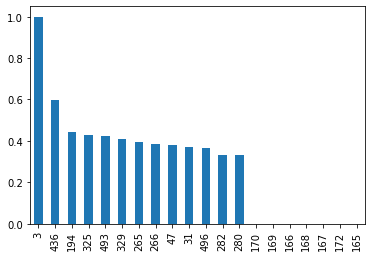

In [100]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [101]:
import seaborn as sns

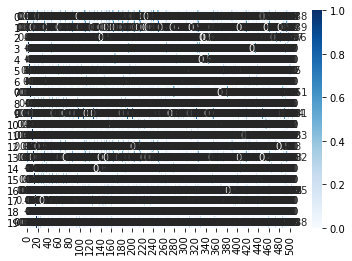

In [102]:
sns.heatmap(similaritydf.head(20), fmt=".2g", cmap= "Blues", annot=True)

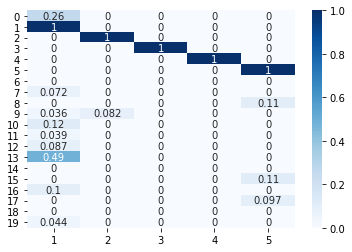

In [103]:
sns.heatmap(similaritydf.head(20)[[1,2,3,4,5]], fmt=".2g", cmap= "Blues", annot=True)

In [104]:
results.sum(axis =0).sort_values(ascending = False)

κορωνοϊός     38.751947
κρούσματα     22.537495
νέα           20.215041
θάνατοι       14.847600
covid         14.385745
                ...    
υπαλλήλους     0.579790
ναρκωτικών     0.557290
υπα            0.540677
νεκρός         0.455531
υπαίθρια       0.430442
Length: 500, dtype: float64

In [105]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

κορωνοϊός    38.751947
κρούσματα    22.537495
νέα          20.215041
θάνατοι      14.847600
covid        14.385745
dtype: float64

In [106]:
results.sum(axis =0).sort_values(ascending = False)

κορωνοϊός     38.751947
κρούσματα     22.537495
νέα           20.215041
θάνατοι       14.847600
covid         14.385745
                ...    
υπαλλήλους     0.579790
ναρκωτικών     0.557290
υπα            0.540677
νεκρός         0.455531
υπαίθρια       0.430442
Length: 500, dtype: float64

In [107]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['νέα κρούσματα', 'covid 19']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['header'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,νέα κρούσματα,covid 19
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [108]:
sum_words.sort_values(ascending = False).head(17)

κορωνοϊός         38.751947
κρούσματα         22.537495
νέα               20.215041
θάνατοι           14.847600
covid             14.385745
διασωληνωμένοι    13.685211
αττική            11.006642
19                10.986078
ελλάδα            10.004796
test               9.972423
θεσσαλονίκη        9.577223
εμβόλιο            9.309054
κορωνοϊό           8.455540
εμβολιασμό         7.767511
πανδημίας          7.627506
δέλτα              7.313209
έρευνα             7.271543
dtype: float64

In [109]:
most_common=sum_words.sort_values(ascending = False).head(16)

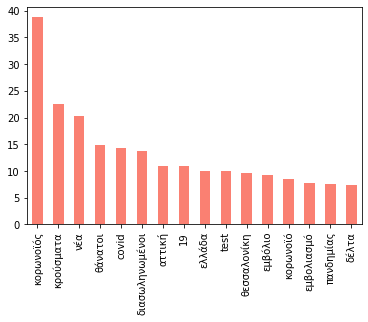

In [110]:
most_common.plot(kind='bar',color='salmon')

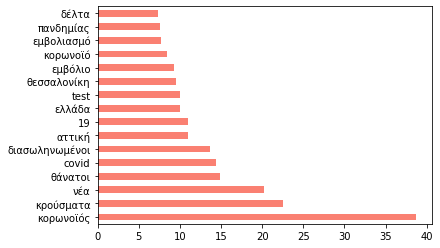

In [111]:
most_common.plot(kind='barh',color='salmon')

In [112]:
sum_words.sort_values(ascending = False).head(20)

κορωνοϊός         38.751947
κρούσματα         22.537495
νέα               20.215041
θάνατοι           14.847600
covid             14.385745
διασωληνωμένοι    13.685211
αττική            11.006642
19                10.986078
ελλάδα            10.004796
test               9.972423
θεσσαλονίκη        9.577223
εμβόλιο            9.309054
κορωνοϊό           8.455540
εμβολιασμό         7.767511
πανδημίας          7.627506
δέλτα              7.313209
έρευνα             7.271543
μετάλλαξη          7.100151
06                 7.008966
δωρεάν             6.994602
dtype: float64

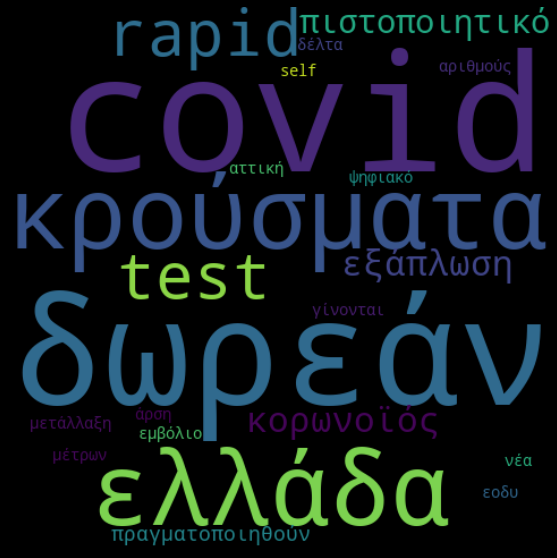

In [113]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("νέα κρούσματα covid 19 κρούσματα αττική 19 ελλάδα ελλάδα αριθμούς rapid test κορωνοϊός εξάπλωση εξάπλωση covid δωρεάν rapid  μετάλλαξη δέλτα self test ψηφιακό πιστοποιητικό πιστοποιητικό covid εμβόλιο κορωνοϊός πραγματοποιηθούν δωρεάν γίνονται δωρεάν εοδυ πραγματοποιηθούν άρση μέτρων")
fig = plt.figure(
    figsize = (20,10),
    facecolor = 'k',
    edgecolor = 'k')
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
